# Worksheet 22

Name:  
UID: 

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

In [1]:
pip install ipympl


Note: you may need to restart the kernel to use updated packages.


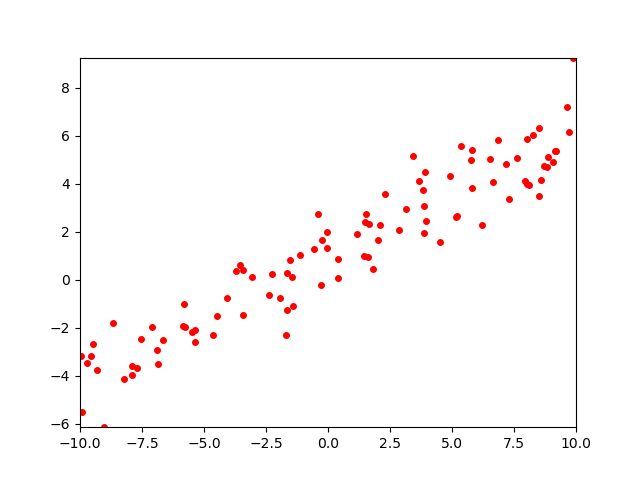

In [2]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import ipympl


beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

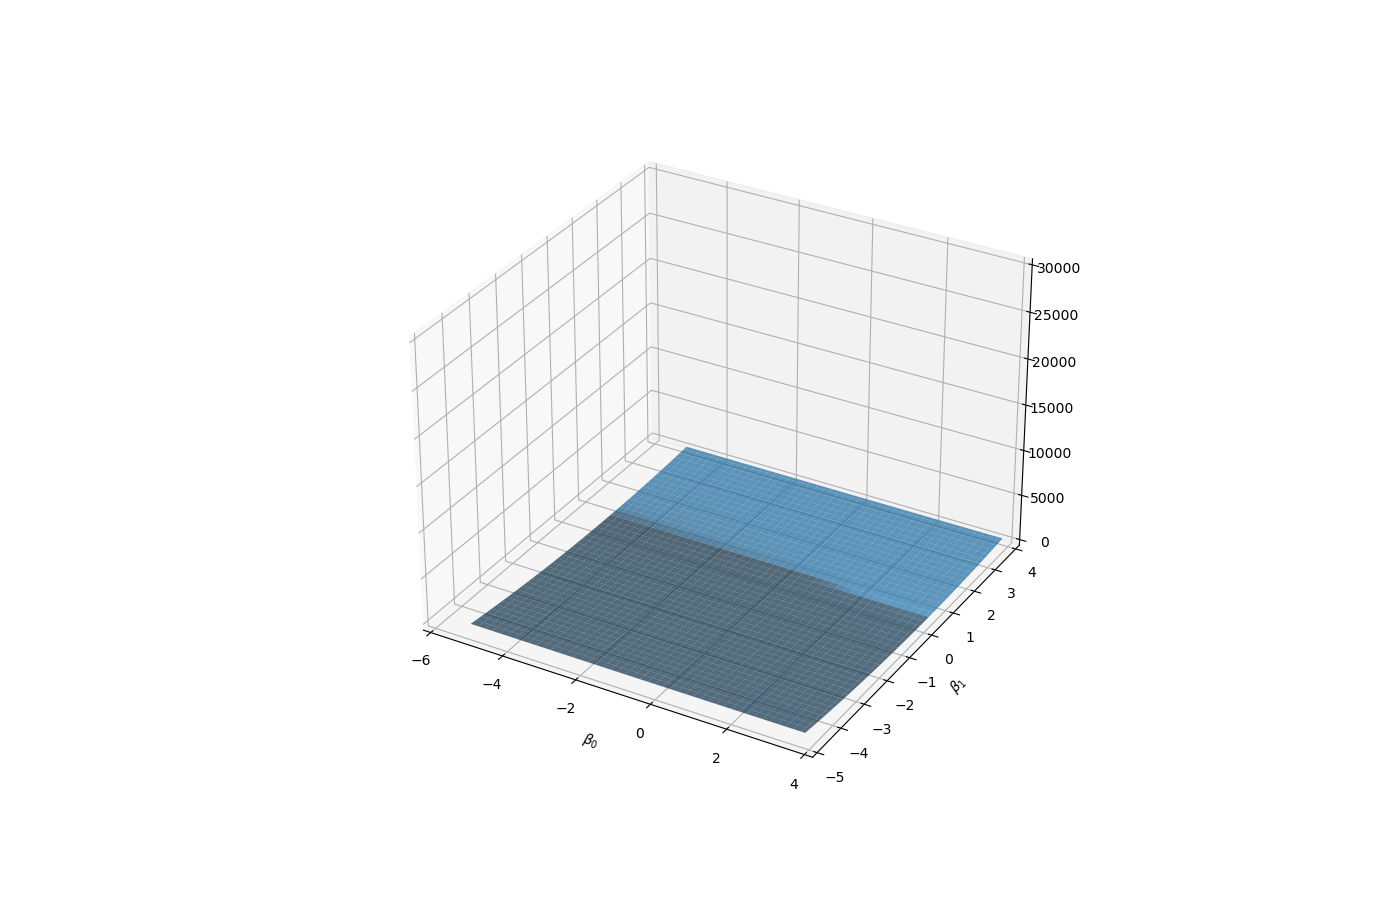

In [3]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    preds= X.dot(beta)
    error= y - preds
    total = np.sum(error ** 2) / len(y)
    return total

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [4]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    preds = X.dot(beta)
    error= y - preds
    gradientt= -2 * X.T.dot(error) / len(y)
    return gradientt


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * (gradient(X, y, beta_hat))

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [5]:
def snap_model(beta,X,y):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat, X, y))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

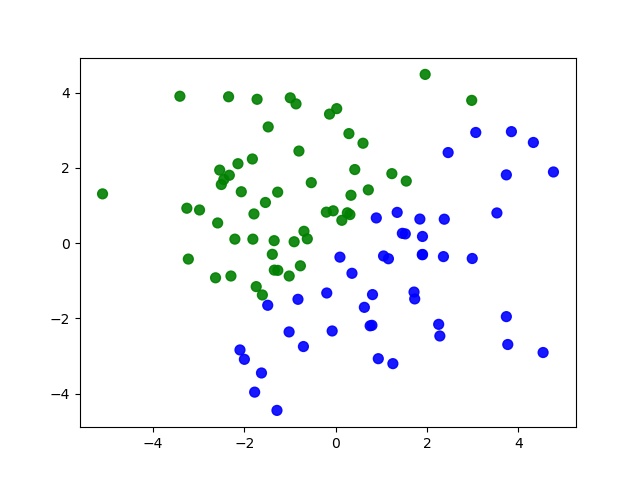

In [6]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

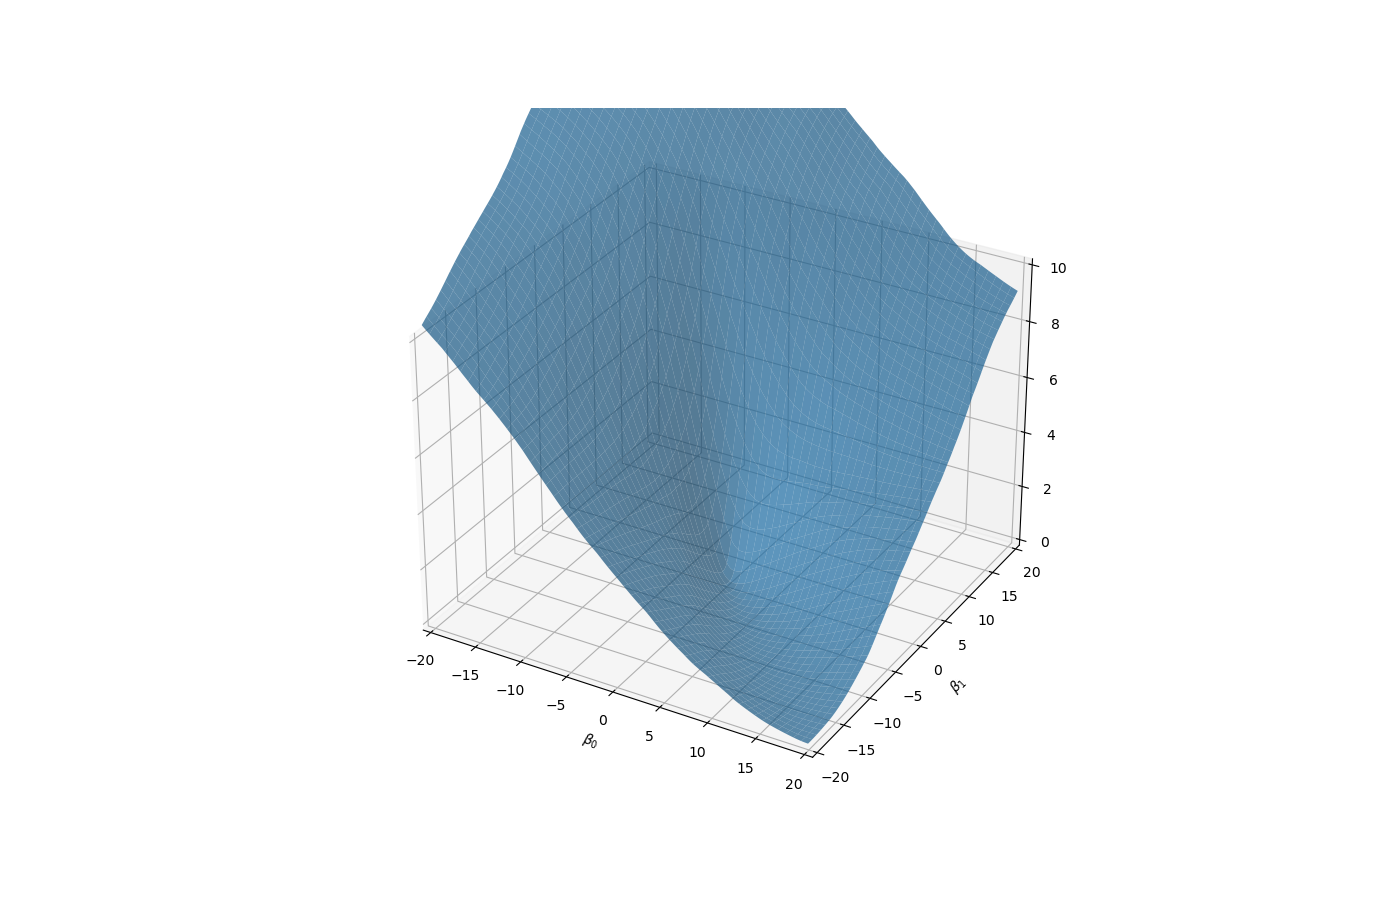

In [7]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)

#i had to change the sigmoid and loss a little to get rid of dvisionbyzero errors
def sigmoid(x):
    z = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-z))


def loss(X, y, beta):
    pred_probs = sigmoid(np.dot(X, beta))
    pred_probs = np.clip(pred_probs, 1e-10, 1 - 1e-10) #added this so it doesnt cause me errors
    final_loss= -np.average(y * np.log(pred_probs) + (1 - y) * np.log(1 - pred_probs))
    return final_loss


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

In [8]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    preds = sigmoid(X.dot(beta))
    return X.T.dot(y - preds) / len(y)


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

f) Create an animation of the logistic regression fit at every epoch.

MovieWriter imagemagick unavailable; using Pillow instead.


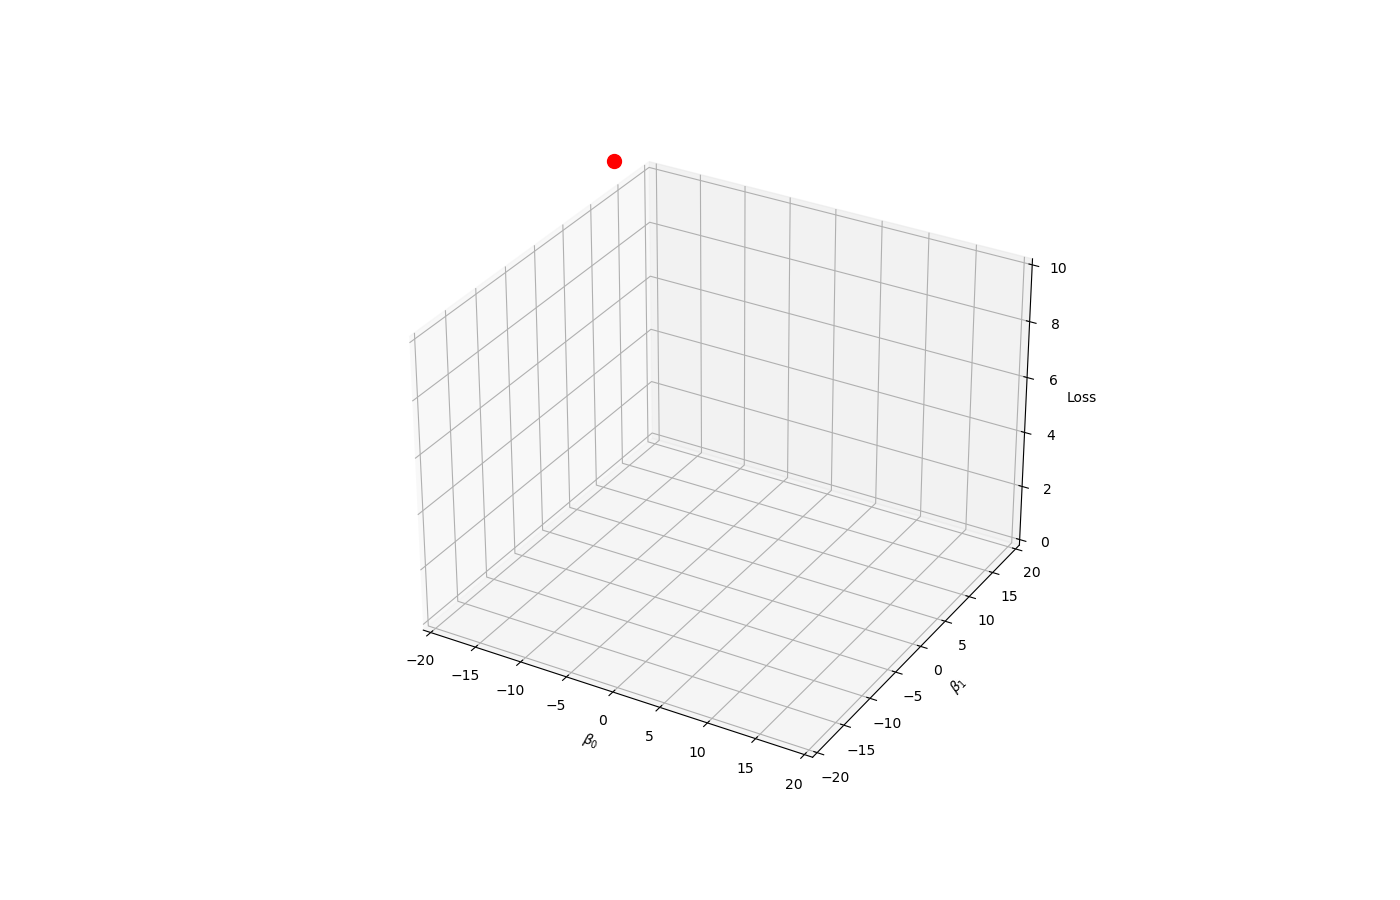

In [12]:

#copying all the code from above
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

def generate_line_data():
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel('Loss')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

def sigmoid(x):
    z = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-z))

def loss(X, y, beta):
    pred_probs = sigmoid(np.dot(X, beta))
    pred_probs = np.clip(pred_probs, 1e-10, 1 - 1e-10)
    return -np.average(y * np.log(pred_probs) + (1 - y) * np.log(1 - pred_probs))

def gradient(X, y, beta):
    preds = sigmoid(X.dot(beta))
    return X.T.dot(y - preds) / len(y)

def update(num, X, y, betas, line):
    beta = betas[num]
    loss_val = loss(X, y, beta)
    line.set_data(np.array([beta[0]]), np.array([beta[1]]))
    line.set_3d_properties(np.array([loss_val]))
    return line,


def gradient_descent(X, y, beta_hat, learning_rate, epochs):
    betas = [beta_hat]
    for _ in range(epochs):
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)
        betas.append(beta_hat)
    return np.array(betas)


beta_start = np.array([-5, -2])
learning_rate = 0.05
epochs = 100


betas = gradient_descent(X, y, beta_start, learning_rate, epochs)

# learned to crate animation from here https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html
line, = ax.plot([], [], [], 'o-', c='r', markersize=10, zorder=10)
ani = animation.FuncAnimation(fig, update, epochs+1, fargs=(X, y, betas, line),
                              interval=100, blit=False)

# Save animation
ani.save('logistic_regression_fit.gif', writer='imagemagick')

plt.show()


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

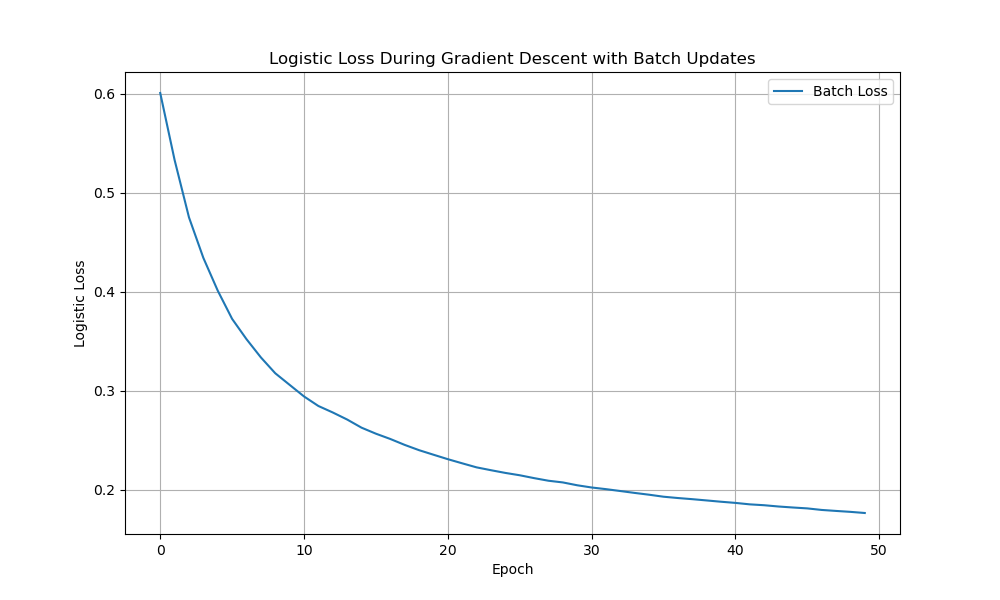

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Function to compute the sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute the logistic loss
def logistic_loss(X, y, beta):
    preds = sigmoid(X @ beta)
    return -np.mean(y * np.log(np.clip(preds, 1e-10, 1 - 1e-10)) +
                    (1 - y) * np.log(np.clip(1 - preds, 1e-10, 1 - 1e-10)))

# Function to compute the gradient of the logistic loss
def logistic_gradient(X, y, beta):
    preds = sigmoid(X @ beta)
    return X.T @ (preds - y) / len(y)

# Function to perform gradient descent with batch updates
def gradient_descent(X, y, beta, learning_rate, epochs, batch_size):
    loss_history = []
    for _ in range(epochs):
        # Randomly choose a batch of data
        idx = np.random.choice(len(y), batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        
        # Compute the gradient using only the batch data
        grad = logistic_gradient(X_batch, y_batch, beta)
        beta -= learning_rate * grad
        
        # Compute the loss using all data and store it
        loss_history.append(logistic_loss(X, y, beta))
    
    return beta, loss_history

# Generate synthetic data for classification
centers = [[-2, 0], [2, 0]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=1.5, random_state=42)
y = (y > 0).astype(np.float32)  # Convert to binary labels

# Add intercept term
X_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize parameters for gradient descent
beta = np.zeros(X_intercept.shape[1])
learning_rate = 0.1
epochs = 50
batch_size = 20  # Size of the batch for each gradient update

# Run gradient descent and record the loss history
beta, loss_history = gradient_descent(X_intercept, y, beta, learning_rate, epochs, batch_size)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Batch Loss')
plt.xlabel('Epoch')
plt.ylabel('Logistic Loss')
plt.title('Logistic Loss During Gradient Descent with Batch Updates')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def batch_gradient_descent(X, y, beta_hat, learning_rate, epochs, batch_size):
    n_samples = X.shape[0]
    betas = [beta_hat]
    for _ in range(epochs):
        idx = np.random.choice(n_samples, batch_size, replace=False)
        X_batch, y_batch = X[idx], y[idx]
        beta_hat = beta_hat - learning_rate * gradient(X_batch, y_batch, beta_hat)
        betas.append(beta_hat)
    return np.array(betas)

def update(num, X, y, betas, line_true, line_batch):
    beta = betas[num]
    loss_val_true = loss(X, y, beta)
    idx = np.random.choice(X.shape[0], batch_size, replace=False)
    loss_val_batch = loss(X[idx], y[idx], beta)

    line_true.set_data(np.array([beta[0]]), np.array([beta[1]]))
    line_true.set_3d_properties(np.array([loss_val_true]))

    line_batch.set_data(np.array([beta[0]]), np.array([beta[1]]))
    line_batch.set_3d_properties(np.array([loss_val_batch]))

    return line_true, line_batch
# Parameters for batch gradient descent
batch_size = 20  # You can adjust this

betas = batch_gradient_descent(X, y, beta_start, learning_rate, epochs, batch_size)

# Create animation with two lines
line_true, = ax.plot([], [], [], 'o-', c='r', markersize=10, zorder=10, label='True Loss')
line_batch, = ax.plot([], [], [], 'o-', c='g', markersize=10, zorder=10, label='Batch Loss')
ani = animation.FuncAnimation(fig, update, epochs+1, fargs=(X, y, betas, line_true, line_batch),
                              interval=100, blit=False)

# Save animation
ani.save('logistic_regression_fit_batch.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [50]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return x[0]**2 + x[1]**2 # change this

def gradient(x):
    return np.array([2*x[0], 2*x[1]]) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 0.1 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

In [14]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return x[0]**2 + x[1]**2 # change this

def gradient(x):
    return np.array([2*x[0], 2*x[1]]) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 0.001 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent_diff_lr.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)